<a href="https://colab.research.google.com/github/darja/NeuralUni/blob/master/21_pytorch_light_ryazhskikh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аппроксимация функции синуса

**Входные параметры:**

Данные функции синуса с шумом.

**Задание:**

1. Найти и исправить ошибки в написании полносвязной сети
2. Изменить/подобрать параметры нейронной сети для хорошей аппроксимации функции SIN (добавление слоёв, изменение размера батча, кол-во нейронов, функции активации)
3. Получить RMSE на выходе меньше 0.05. (значение RMSE выводится на графике ниже)
4. Написать небольшой отчет в колабе о выполненной работе

# Настройка окружения

In [0]:
import numpy
import torch
import sys
import math
from matplotlib import pyplot as plt
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from math import sqrt

numpy.random.seed(10)

# Входные данные

In [0]:
# don't change!
DATA_SIN = "-5.2636369119390825 0.16623288670818218;9.230777581594701 0.011532223694511819;7.986188712554348 0.1662848075363252;-1.1426283729290247 -0.16348659739962448;-6.6522857778450835 -0.06912041591231023;4.591736278036677 -0.19404528525828824;6.700839315489958 0.0751947647493167;3.945656856888675 -0.14297635739795875;-9.179264626208564 -0.04217531675092295;-4.644380171362519 0.17849435236363942;-9.28899731601476 -0.06381197634490965;-2.5025348230444777 -0.0975239547049567;6.937085777803638 0.11060853413357667;4.477701777308521 -0.1983688424886691;5.697796461164701 -0.06878529654065474;6.761438974728481 0.09523049379010978;-7.572607523890369 -0.1641933331415422;2.4207757218812844 0.10223940992788129;-0.9847476073368284 -0.13312624259316752;-2.1393696119104266 -0.14890881246661739;-4.371421705064076 0.1564706344893645;3.574515555720996 -0.07609697560390583;-5.948470628896432 0.059437349136802126;-5.882351031931434 0.08908599480675033;8.038059942735167 0.17853425307774967;9.762756103110213 -0.07151950616788014;3.269685732970064 -0.04150577756140339;7.68004805197339 0.17003879910206376;-6.3006782664093075 -0.014327485922740902;-6.3870913512909055 0.009437249493686793;-5.3230590268032625 0.16388382185950304;7.36774030750145 0.19309578544143238;7.868418962374346 0.18162157379549107;-4.988197524488496 0.16960612526972682;4.356689322330226 -0.16774078395209244;-3.2587923705128974 0.007596650876638627;1.9584274581246 0.18577507399767507;-5.74135606978607 0.10295506203449888;3.055034003299145 0.0034667537926426203;1.6681732033590961 0.16188074429402227;-5.2372001705064815 0.17659761450916134;1.7016967842569297 0.17441417588702354;-3.8657347192685627 0.09278170544929833;-2.996474733600822 -0.04938086810358416;-5.129022654347459 0.15089713457554385;2.4219662295645783 0.14252396358720096;7.615542973588646 0.18863677818572588;9.481453652406543 0.0027675352145521658;-9.26940175390987 -0.06747760787534662;5.8369876149140865 -0.08238795721413675;-9.77107546799708 0.025691629736851646;8.782198503602626 0.11042727083820084;8.760562534542949 0.09933188692967355;0.3582663562137629 0.08269779837375253;-9.855985439308508 0.06874456232700567;-4.214217126282211 0.15342515850419586;8.548620178734016 0.10251813499626611;-0.3869902690890328 -0.025535736007967942;-9.064434805384394 -0.059881205484686936;-7.132943088157557 -0.11384213680905342;6.903939825354186 0.1069441620109321;-0.23770614318144645 -0.049941341517723545;9.719554442601599 -0.06083721296374967;1.353172604231192 0.1728189435277096;8.753060601573416 0.09646274820048795;3.391367006941108 -0.05989269463759624;3.5430478483604446 -0.07692588296260605;-5.106454759229086 0.15481459250179902;5.324425823839693 -0.1268812736336531;0.9836346438794124 0.14227076331532051;-5.196426217955863 0.15740243499677348;-9.810640021266847 0.03494605402382934;1.6595132291625916 0.18144984144566548;5.286349391616119 -0.13684294376769188;8.359531386695991 0.11857223412104406;-5.549070159677056 0.13809552802075073;-9.33967962831842 -0.006022741883309122;-4.509527424446453 0.1565900784273597;1.9784117977861477 0.143295398683226;6.718993083651689 0.0819165990539593;-4.253342692845781 0.13584805540663805;1.9096317458843064 0.1433176294621149;3.092051740110623 -0.013178213206291601;8.444228169482784 0.11895220241312986;-4.554807715076452 0.18049551233119915;-1.5044781156553348 -0.16962280839852248;-4.087688651938768 0.1484962994592455;1.6493104736307345 0.1783280247451957;-1.0241267605542248 -0.14574920272048772;-2.2274245744322947 -0.14591548756799153;9.541962576675424 -0.027460016066448056;1.6838672466052333 0.17790444130964697;7.167129401651607 0.1528321557488259;1.656778036105175 0.202539722186916;4.313993136268515 -0.1769883895136664;-1.5666154785736417 -0.1634299595154476;-7.055796129303946 -0.12493445452861843;4.549140699189277 -0.1613320271713921;3.8341573285057535 -0.11741437018491953;5.92298217055286 -0.0544016359634751;-3.6675079796014254 0.06765860991023742;-3.2093932779686636 0.012342366603305732;6.104302311509759 -0.023604701063800682;9.219685756040658 0.021830510962972328;-5.27564956737808 0.15876937213159775;-7.226693026861948 -0.11964201323400983;-7.718266326269269 -0.1623308873652737;-3.3795885232153022 0.028031149581326825;-4.931168306751747 0.17638722570785678;-4.732898182892928 0.16403240279848091;6.379630736629515 0.037744085417636124;-1.8156149876315553 -0.17586047811869415;9.123008058274458 0.041504327628874814;-7.909190257380477 -0.1820120564147958;-9.962040650364376 0.06526094477884098;-1.0071640256407832 -0.1639330868189485;7.2007755607063295 0.15137169494112515;5.376270559223915 -0.13941583222411097;-4.040296879501353 0.12073102612042336;8.431373975118806 0.14244304578288333;-4.254129576438266 0.14481937501332637;-3.9969179141544124 0.12632028641555768;-2.9138404180683946 -0.05740097784572907;-1.285281806536302 -0.1457477762244583;-9.129046727519302 -0.051583083672464336;8.418209582756273 0.12587159891477329;-7.392668143031045 -0.1469219150958637;-8.715710488620447 -0.12267586500581723;8.599750380684444 0.12844677435609553;-2.556100610492795 -0.10903470134045949;6.068122655919492 -0.027678731195968535;1.5547126863670222 0.19006539868699215;8.876717031623336 0.09729350624637315;-3.958253722864975 0.11932868450570774;5.277798471138164 -0.14002863743997168;0.7989877978580786 0.11986224535259232;4.895091755860378 -0.1625139936050777;-8.299835841047368 -0.16145343835271714;0.2883589134803479 0.04775223030797715;-8.248385412246053 -0.1429703268148147;3.3082219720964368 -0.04748902373059952;-4.940952834626142 0.17491593027033125;0.12046506334504947 0.02970584941848692;-2.000019305739615 -0.176822597412183;-1.1461642314941791 -0.1641315050260509;8.322988738954137 0.1552079462422884;-2.303270194975335 -0.11195304020117632;0.46715739214016594 0.06920320121363005;-1.6035512996240637 -0.16682101586321976;0.5991286812281373 0.12261834572056522;-5.131367329997342 0.15780458189597313;-4.564293632250525 0.16214804295194596;4.6615100398789515 -0.18726168426796344;7.652653407467941 0.1648129421497241;-9.604029174517734 0.03972079274750273;-1.1148906504494747 -0.14604447358806008;6.35131801805996 0.0308269028076373;-8.695544253468308 -0.12532355732304945;8.147539476123235 0.1594580149415328;-2.084283366962641 -0.15434413959230395;-5.417483301130968 0.14388349573766213;2.4852425909782223 0.10151157452970254;-5.938766684097785 0.07594410384513435;-1.6067671522674143 -0.18722273267300715;0.7751882387306388 0.12428982335028842;7.58179601997568 0.18787054002920675;7.640054384561431 0.17908029625097693;6.508004930467944 0.06962994890227125;-6.0540068983756745 0.04530603300462901;0.3711515065320903 0.05658265918367694;-3.411609802023854 0.0391969143325822;-4.921721628608731 0.17140080177692635;4.446631361284812 -0.1561679145234477;4.047595497150997 -0.14324196671743175;-1.7984082774807995 -0.1741075618304311;-7.0572686585206075 -0.1278498744021697;3.6487722211074054 -0.10470796859559806;5.697236514359476 -0.08145376427485419;4.519244387395801 -0.17034326540653136;2.791993966750379 0.04815169404490108;0.14632791989709126 0.047000937825241805;-0.9534103991803882 -0.14355792047749652;3.388926745138381 -0.047880871796941574;0.25593323331556306 0.04951689134259156;-3.26552120204102 0.009362257063132696;-7.396795767325011 -0.14657127797711203;1.5382038782042926 0.16980661441016243;8.866397298161694 0.10392991561315454;9.38143873899909 -0.00978293491779277;3.880537901904324 -0.12544061758841737;-9.251043358743253 -0.03366912135961825;-6.314825335919401 -0.0024066212924281497;2.454112582598123 0.09780998243378698;-4.533582869113184 0.16787945622115438;-6.001444813425028 0.05751784358010066;3.5294658915940254 -0.05260390409859201;1.8297194415656932 0.18183106360842086;-9.950865800773308 0.06646563274674751;2.383340241249723 0.0944896686847054;-2.7190167021125884 -0.0707887186316011"

fx = DATA_SIN.split(';')
x = numpy.array([float(x.split()[0]) for x in fx])
y = numpy.array([float(x.split()[1]) for x in fx])

## Демонстрация данных

In [0]:
print("X shape: ", x.shape)
print("Y shape: ", x.shape)

X shape:  (200,)
Y shape:  (200,)


In [0]:
import pandas as pd

df = pd.DataFrame(data=y, index=x)
df.columns=["dataset"]

y_real = [math.sin(alpha) / 5 for alpha in x]
df.insert(column="real", value=y_real, loc=1)

df = df.sort_index()

In [0]:
df.head()

,dataset,real
-9.962041,0.065261,0.511786
-9.950866,0.066466,0.502154
-9.855985,0.068745,0.417968
-9.810640,0.034946,0.376358
-9.771075,0.025692,0.339417


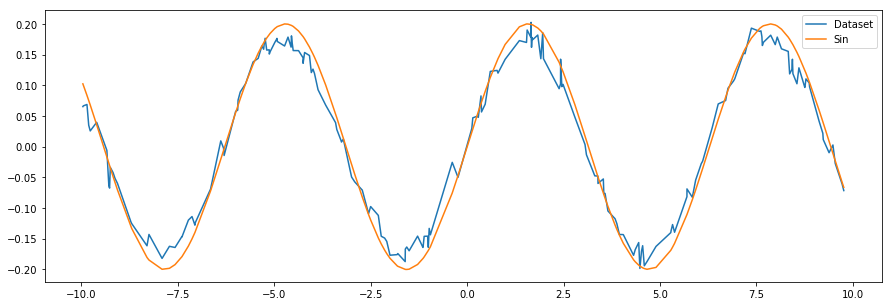

In [0]:
                    
plt.figure(figsize=(15,5))
plt.plot(df["dataset"], label='Dataset')
plt.plot(df["real"], label='Sin')
plt.legend()
plt.show()

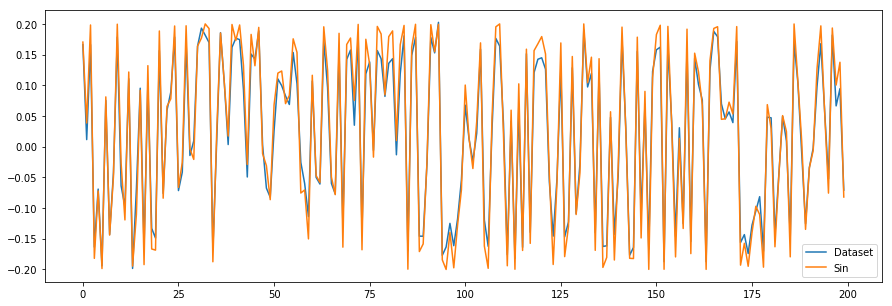

In [0]:
plt.figure(figsize=(15,5))
plt.plot(y, label='Dataset')
plt.plot(y_real, label='Sin')
plt.legend()
plt.show()

In [0]:
print(f"RMSE: {sqrt(mean_squared_error(y, y_real))}")

RMSE: 0.023467964141723436


# Нейросеть

## Класс со структурой нейросети

In [0]:
class SinNet(torch.nn.Module):
    def __init__(self, hidden_neurons):
        super(SinNet, self).__init__()
        
        in_features = 1
        layers = {}
        for out_features in hidden_neurons:
            layers[f"Linear_{in_features}_{out_features}"] = torch.nn.Linear(in_features, out_features)
            layers[f"ReLU_{in_features}_{out_features}"] = torch.nn.ReLU()
            in_features = out_features
        
        layers["Out"] = torch.nn.Linear(in_features, 1)
        self.layers = OrderedDict(layers)
        self.model = torch.nn.Sequential(self.layers)
        

    def forward(self, x):
        return self.model(x)
    
    def summary(self):
        for layer in self.layers:
            print(layer)

## Создание и обучение нейросети

In [0]:
numpy.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

# sin_net = SinNet([10, 25, 50])
# sin_net = SinNet([8, 16, 32])
# sin_net = SinNet([8, 16, 32, 64, 128])
# sin_net = SinNet([4, 32, 128])
# sin_net = SinNet([8, 16, 32, 64])
# sin_net = SinNet([5, 10, 25, 50, 100])

sin_net = SinNet([4, 8, 16, 32, 64])
sin_net.summary()

# объявление функции потерь
loss = torch.nn.MSELoss()

# создаем оптимизатор 
optimizer = torch.optim.Adam(sin_net.parameters(), lr=0.01)

batch_size = 16
epochs = 30

losses = []
for epoch_index in range(epochs):
    order = numpy.random.permutation(x.size)
    
    for start_index in range(0, x.size, batch_size):
        optimizer.zero_grad()
        
        batch_items = order[start_index:start_index + batch_size]
        
        x_batch = torch.FloatTensor(x[batch_items].reshape([-1, 1]))
        y_batch = torch.FloatTensor(y[batch_items].reshape([-1, 1]))

        x_var = torch.autograd.Variable(x_batch)
        y_var = torch.autograd.Variable(y_batch)

        y_pred = sin_net.forward(x_var)

        loss_val = loss(y_pred, y_var)
        loss_val.backward()
        optimizer.step()
        
        losses.append(loss_val.item())


Linear_1_4
ReLU_1_4
Linear_4_8
ReLU_4_8
Linear_8_16
ReLU_8_16
Linear_16_32
ReLU_16_32
Linear_32_64
ReLU_32_64
Out


## Демонстрация работы

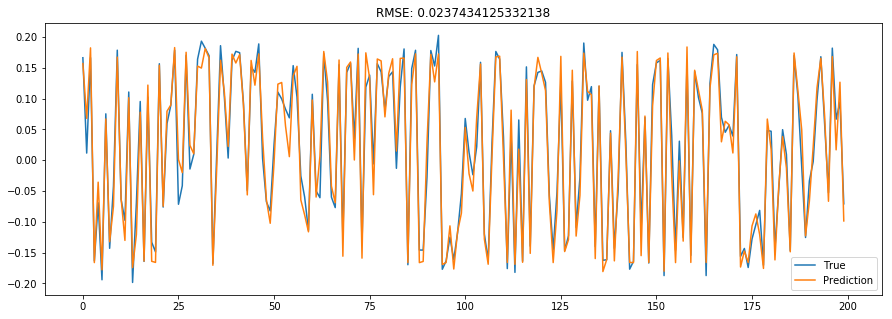

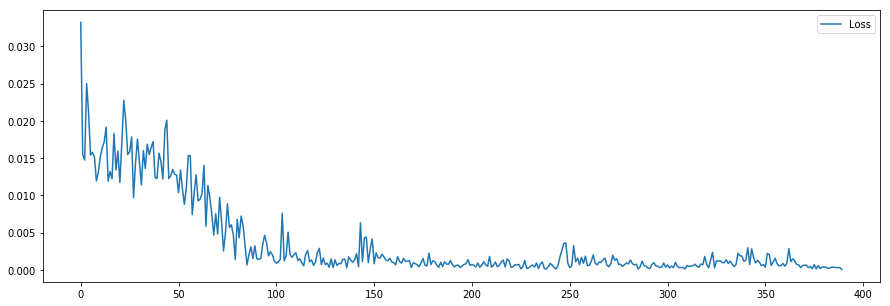

In [0]:
x_t = torch.FloatTensor(x.reshape([-1, 1]))

x_var = torch.autograd.Variable(x_t)

y_pred = sin_net.forward(x_var)  # Прогноз

y_pred = y_pred.data.numpy()

plt.figure(figsize=(15,5))
plt.plot(y,label='True')
plt.plot(y_pred,label='Prediction')
plt.title(f"RMSE: {sqrt(mean_squared_error(y, y_pred))}")
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(losses,label='Loss')
plt.legend()